In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
df = pd.read_csv('../datasets/Phishing_Legitimate_full.csv')
df1 = pd.read_csv('../datasets/phishing_site_urls.csv')
df2 = pd.read_csv('../datasets/Website Phishing.csv')

In [3]:
df.drop(['id'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NumDots                             10000 non-null  int64  
 1   SubdomainLevel                      10000 non-null  int64  
 2   PathLevel                           10000 non-null  int64  
 3   UrlLength                           10000 non-null  int64  
 4   NumDash                             10000 non-null  int64  
 5   NumDashInHostname                   10000 non-null  int64  
 6   AtSymbol                            10000 non-null  int64  
 7   TildeSymbol                         10000 non-null  int64  
 8   NumUnderscore                       10000 non-null  int64  
 9   NumPercent                          10000 non-null  int64  
 10  NumQueryComponents                  10000 non-null  int64  
 11  NumAmpersand                        10000 

<AxesSubplot:>

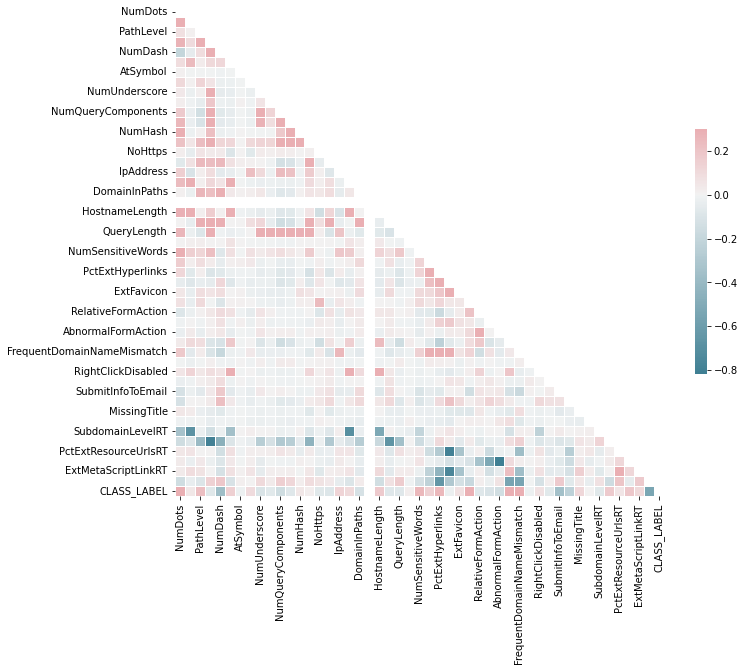

In [4]:
# create a half correlation matrix using plt
corr = df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [5]:
df1.head(5)

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


From the above results for df1, we need to pre-process the label to make it numerical.

In [6]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder(drop='first', dtype=np.int0)
dfn = df1[['Label']]
dfn = oh.fit_transform(dfn).toarray()
dfn = pd.DataFrame(dfn)
df1 = pd.concat([df1, dfn], axis=1)
df1.drop(['Label'], axis=1, inplace=True)

In [7]:
df1.tail(5)

,URL,0
549341,23.227.196.215/,0
549342,apple-checker.org/,0
549343,apple-iclods.org/,0
549344,apple-uptoday.org/,0
549345,apple-search.info,0


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   SFH                1353 non-null   int64
 1   popUpWidnow        1353 non-null   int64
 2   SSLfinal_State     1353 non-null   int64
 3   Request_URL        1353 non-null   int64
 4   URL_of_Anchor      1353 non-null   int64
 5   web_traffic        1353 non-null   int64
 6   URL_Length         1353 non-null   int64
 7   age_of_domain      1353 non-null   int64
 8   having_IP_Address  1353 non-null   int64
 9   Result             1353 non-null   int64
dtypes: int64(10)
memory usage: 105.8 KB


In [9]:
X = df.drop(['CLASS_LABEL'], axis=1)
y = df['CLASS_LABEL']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
X2 = df1.drop(['URL'] , axis=1)
y2 = df1['URL']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

In [12]:
X3 = df2.drop(['Result'], axis=1)
y3 = df2['Result']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=0)

In [13]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# creating a decision tree classifier
cart = DecisionTreeClassifier()

In [14]:
from sklearn.model_selection import cross_val_score
# generating cross validation scores
results = cross_val_score(cart, X_train, y_train)
for i in range(len(results)):
    print("Model: %d : %f" % (i, results[i]))

Model: 0 : 0.970000
Model: 1 : 0.956429
Model: 2 : 0.962143
Model: 3 : 0.962857
Model: 4 : 0.959286


In [15]:
# Subsamples to train models
from sklearn.model_selection import KFold
seed = 3
kf = KFold(n_splits=10, shuffle=True, random_state=seed)

In [16]:
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
model_rf = RandomForestClassifier(n_estimators=num_trees, random_state=seed)

In [17]:
results = cross_val_score(cart, X_train, y_train, cv=kf)
for i in range(len(results)):
    print("Model: %d : %f" % (i, results[i]))

Model: 0 : 0.964286
Model: 1 : 0.967143
Model: 2 : 0.961429
Model: 3 : 0.974286
Model: 4 : 0.962857
Model: 5 : 0.964286
Model: 6 : 0.952857
Model: 7 : 0.948571
Model: 8 : 0.970000
Model: 9 : 0.965714


In [18]:
results_rf = cross_val_score(model_rf, X_train, y_train, cv=kf)
for i in range(len(results_rf)):
    print("Model: %d : %f" % (i, results_rf[i]))

Model: 0 : 0.977143
Model: 1 : 0.982857
Model: 2 : 0.987143
Model: 3 : 0.984286
Model: 4 : 0.990000
Model: 5 : 0.977143
Model: 6 : 0.980000
Model: 7 : 0.971429
Model: 8 : 0.988571
Model: 9 : 0.984286


In [19]:
print("Mean accuracy of Bagging Classifier: %.3f" % results.mean())
print("Mean accuracy of Random Forest Classifier: %.3f" % results_rf.mean())

Mean accuracy of Bagging Classifier: 0.963
Mean accuracy of Random Forest Classifier: 0.982


In [20]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
pred = np.shape(y_test)[0] - np.count_nonzero(y_pred - y_test)
accuracy = 100 * pred / np.shape(y_test)[0]
print("Accuracy is: %f" % accuracy)

Accuracy is: 97.333333


In [21]:
from sklearn.metrics import f1_score, r2_score
f1s = f1_score(y_test, y_pred)
r2s = r2_score(y_test, y_pred)
print("F1 score is: %f" % f1s)
print("R2 score is: %f" % r2s)

F1 score is: 0.973650
R2 score is: 0.893328


## Random Forest Classifier

In [22]:
# drop rows where Result = 0 in df2, but keep the others
df2 = df2[df2['Result'] != 0]
# bar plot of Result
df2.groupby('Result').size()

Result
-1    702
 1    548
dtype: int64

In [23]:
# apply random forest classifier to df2
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=100, random_state=seed)
model22 = BaggingClassifier(base_estimator=model2, n_estimators=num_trees, random_state=seed)
results2 = cross_val_score(model2, X3_train, y3_train, cv=kf)
for i in range(len(results2)):
    print("Model: %d : %f" % (i, results2[i]))

Model: 0 : 0.905263
Model: 1 : 0.894737
Model: 2 : 0.915789
Model: 3 : 0.863158
Model: 4 : 0.926316
Model: 5 : 0.915789
Model: 6 : 0.926316
Model: 7 : 0.882979
Model: 8 : 0.882979
Model: 9 : 0.861702


In [39]:
print("Mean accuracy is: %f" % results.mean())

Mean accuracy is: 0.963143


In [25]:
print("Mean accuracy is: %f" % results2.mean())

Mean accuracy is: 0.897503


In [26]:
# y pred
model22.fit(X3_train, y3_train)
y_pred2 = model22.predict(X3_test)
pred2 = np.shape(y3_test)[0] - np.count_nonzero(y_pred2 - y3_test)
accuracy2 = 100 * pred2 / np.shape(y3_test)[0]
print("Accuracy is: %f" % accuracy2)

Accuracy is: 88.423645


In [27]:
from sklearn.metrics import f1_score, r2_score
f1s = f1_score(y3_test, y_pred2, average='weighted')
r2s = r2_score(y3_test, y_pred2)
print("F1 score is: %f" % f1s)
print("R2 score is: %f" % r2s)

F1 score is: 0.884020
R2 score is: 0.556736


In [28]:
from sklearn.svm import SVC
model3 = SVC(kernel='rbf', C=1, gamma=0.1)
results3 = cross_val_score(model3, X3_train, y3_train, cv=kf)
for i in range(len(results3)):
    print("Model: %d : %f" % (i, results3[i]))

Model: 0 : 0.894737
Model: 1 : 0.842105
Model: 2 : 0.852632
Model: 3 : 0.863158
Model: 4 : 0.905263
Model: 5 : 0.863158
Model: 6 : 0.852632
Model: 7 : 0.840426
Model: 8 : 0.840426
Model: 9 : 0.872340


In [29]:
print("Mean accuracy is: %f" % results3.mean())

Mean accuracy is: 0.862688


In [30]:
# gradient boosting tree
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=seed)
results4 = cross_val_score(model4, X_train, y_train, cv=kf)
for i in range(len(results4)):
    print("Model: %d : %f" % (i, results4[i]))

Model: 0 : 0.982857
Model: 1 : 0.977143
Model: 2 : 0.977143
Model: 3 : 0.978571
Model: 4 : 0.975714
Model: 5 : 0.972857
Model: 6 : 0.975714
Model: 7 : 0.965714
Model: 8 : 0.982857
Model: 9 : 0.982857


In [31]:
print("Mean accuracy is: %f" % results4.mean())

Mean accuracy is: 0.977143


In [32]:
df_custom = df
# custom model for model22 with a subset of features
df_custom.drop("RandomString", axis=1, inplace=True)
df_custom.drop("HttpsInHostname", axis=1, inplace=True)
df_custom.drop("EmbeddedBrandName", axis=1, inplace=True)
df_custom.drop("PctExtHyperlinks", axis=1, inplace=True)
df_custom.drop("PctExtResourceUrls", axis=1, inplace=True)
df_custom.drop("ExtFavicon", axis=1, inplace=True)
df_custom.drop("InsecureForms", axis=1, inplace=True)
df_custom.drop("AbnormalFormAction", axis=1, inplace=True)
df_custom.drop("PctNullSelfRedirectHyperlinks", axis=1, inplace=True)
df_custom.drop("FrequentDomainNameMismatch", axis=1, inplace=True)
df_custom.drop("FakeLinkInStatusBar", axis=1, inplace=True)
df_custom.drop("RightClickDisabled", axis=1, inplace=True)
df_custom.drop("PopUpWindow", axis=1, inplace=True)
df_custom.drop("SubmitInfoToEmail", axis=1, inplace=True)
df_custom.drop("IframeOrFrame", axis=1, inplace=True)
df_custom.drop("MissingTitle", axis=1, inplace=True)
df_custom.drop("ImagesOnlyInForm", axis=1, inplace=True)
df_custom.drop("SubdomainLevelRT", axis=1, inplace=True)
df_custom.drop("UrlLengthRT", axis=1, inplace=True)
df_custom.drop("PctExtResourceUrlsRT", axis=1, inplace=True)
df_custom.drop("AbnormalExtFormActionR", axis=1, inplace=True)
df_custom.drop("ExtMetaScriptLinkRT", axis=1, inplace=True)
df_custom.drop("PctExtNullSelfRedirectHyperlinksRT", axis=1, inplace=True)
df_custom.drop("RelativeFormAction", axis=1, inplace=True)
df_custom.drop("ExtFormAction", axis=1, inplace=True)

In [33]:
df_custom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   NumDots             10000 non-null  int64
 1   SubdomainLevel      10000 non-null  int64
 2   PathLevel           10000 non-null  int64
 3   UrlLength           10000 non-null  int64
 4   NumDash             10000 non-null  int64
 5   NumDashInHostname   10000 non-null  int64
 6   AtSymbol            10000 non-null  int64
 7   TildeSymbol         10000 non-null  int64
 8   NumUnderscore       10000 non-null  int64
 9   NumPercent          10000 non-null  int64
 10  NumQueryComponents  10000 non-null  int64
 11  NumAmpersand        10000 non-null  int64
 12  NumHash             10000 non-null  int64
 13  NumNumericChars     10000 non-null  int64
 14  NoHttps             10000 non-null  int64
 15  IpAddress           10000 non-null  int64
 16  DomainInSubdomains  10000 non-null  int64

In [34]:
X = df_custom.drop("CLASS_LABEL", axis=1)
y = df_custom["CLASS_LABEL"]
# split df_custom
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

In [35]:
kf_custom = KFold(n_splits=10, shuffle=True, random_state=seed)

In [36]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
model5 = RandomForestClassifier(n_estimators=100, random_state=seed)
results5 = cross_val_score(model5, X_train, y_train, cv=kf)
for i in range(len(results5)):
    print("Model: %d : %f" % (i, results5[i]))

Model: 0 : 0.922667
Model: 1 : 0.902667
Model: 2 : 0.904000
Model: 3 : 0.921333
Model: 4 : 0.916000
Model: 5 : 0.902667
Model: 6 : 0.905333
Model: 7 : 0.894667
Model: 8 : 0.910667
Model: 9 : 0.900000


In [40]:
print("Mean accuracy is: %f" % results5.mean())

Mean accuracy is: 0.908000


In [37]:
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)
pred = np.shape(y_test)[0] - np.count_nonzero(y_pred - y_test)
accur = 100 * pred / np.shape(y_test)[0]
print("Accuracy is: %f" % accur)

Accuracy is: 89.760000


## Dumping the model(s)

In [38]:
import pickle
predictor = model5.predict_proba(X_test)
print(predictor)
pickle.dump(model5, open('model.pkl', 'wb'))
model = pickle.load(open('model.pkl', 'rb'))

[[1.   0.  ]
 [0.97 0.03]
 [0.   1.  ]
 ...
 [1.   0.  ]
 [0.98 0.02]
 [0.09 0.91]]
